<a href="https://colab.research.google.com/github/Rishabh1928/IPL-T20-Cricket-Analysis/blob/main/Rishabh_Kesarwani_24_02_2021_%5BABTN0104%5D_IPL_T20_Cricket_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Indian Premier League(IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India. The league was founded by the Board of Control for Cricket in India(BCCI) in 2008. </b>

## <b> Explore and analyze the data to discover results and statistics for different teams playing in IPL. </b>

In [1]:
# Importing basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Mounting the drive to get the data files

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# loading files and reading using pandas.read_csv()

working_dir = "/content/drive/MyDrive/Almabetter/Capstone Project 1 (IPL-T20)/Data/"

deliveries_df = pd.read_csv(working_dir + "deliveries.csv")
matches_df = pd.read_csv(working_dir + "matches.csv")
teams_df = pd.read_csv(working_dir + "teams.csv")
avg_strikerate_df = pd.read_csv(working_dir + "most_runs_average_strikerate.csv")

## Basic inspection

In [4]:
# Checking columns

deliveries_df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [5]:
# Getting info of deliveries (null/non null)

deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [6]:
deliveries_df.shape

(179078, 21)

In [7]:
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [8]:
matches_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [9]:
matches_df.shape

(756, 18)

In [10]:
matches_df["Season"].unique()

array(['IPL-2017', 'IPL-2008', 'IPL-2009', 'IPL-2010', 'IPL-2011',
       'IPL-2012', 'IPL-2013', 'IPL-2014', 'IPL-2015', 'IPL-2016',
       'IPL-2018', 'IPL-2019'], dtype=object)

In [11]:
# Getting unique seasons that are availble with us in the dataset

matches_df["Season"].nunique()  # can use len() also

12

In [12]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [13]:
# getting count of player of the match award (like who won what number of player of match award)

matches_df["player_of_match"].value_counts()

CH Gayle          21
AB de Villiers    20
DA Warner         17
RG Sharma         17
MS Dhoni          17
                  ..
RE Levi            1
TA Boult           1
JJ Roy             1
R Bhatia           1
RA Tripathi        1
Name: player_of_match, Length: 226, dtype: int64

## Top 5 players with most player of the match award

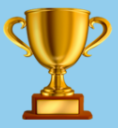



In [14]:
matches_df["player_of_match"].value_counts().head() # as head will give by default top 5 observations

CH Gayle          21
AB de Villiers    20
DA Warner         17
RG Sharma         17
MS Dhoni          17
Name: player_of_match, dtype: int64

In [15]:
# Alternate way

top_five_player_of_match = matches_df["player_of_match"].value_counts()[0:5]
top_five_player_of_match

CH Gayle          21
AB de Villiers    20
DA Warner         17
RG Sharma         17
MS Dhoni          17
Name: player_of_match, dtype: int64

Text(0.5, 0, 'Number of matches')

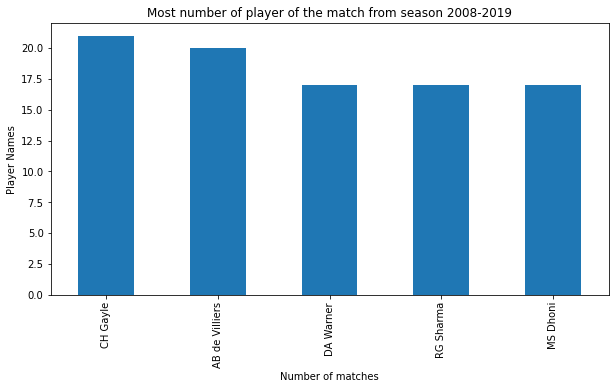

In [16]:
# Visualizing this using bar plot

plt.rcParams['figure.figsize'] = (10, 5)

top_five_player_of_match.plot(kind = "bar")
plt.title("Most number of player of the match from season 2008-2019")
plt.ylabel("Player Names")
plt.xlabel("Number of matches")


Text(0, 0.5, 'Number of matches')

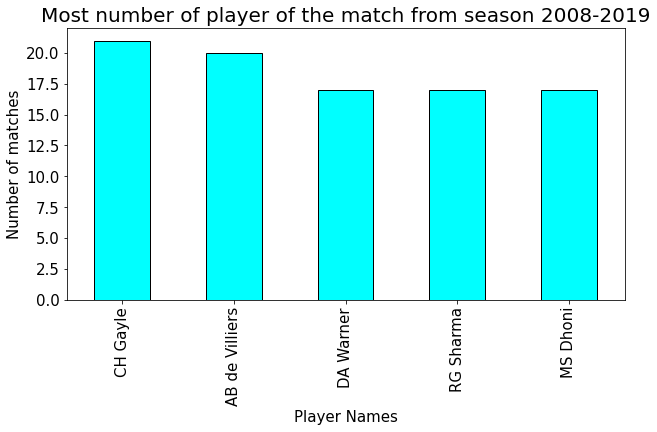

In [17]:
# Alternate way
# Creating the figure object

ax = top_five_player_of_match.plot.bar(figsize = (10, 5) , fontsize = 15 , color = "cyan" , edgecolor = "black")

# Setting the title

ax.set_title("Most number of player of the match from season 2008-2019" , fontsize = 20)

# Setting x and y labels

ax.set_xlabel("Player Names" , fontsize = 15)
ax.set_ylabel("Number of matches" , fontsize = 15)


*Ahh! seems like Chris Gayle is always in the form , as he lifted the player of the match trophy maximum number of times!!*

# Which season had the most the number IPL matches?

In [18]:
matches_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [84]:
matches_per_season = matches_df["Season"].value_counts() # IPL-2013 season had the most number of matches
matches_per_season

IPL-2013    76
IPL-2012    74
IPL-2011    73
IPL-2018    60
IPL-2010    60
IPL-2016    60
IPL-2019    60
IPL-2014    60
IPL-2017    59
IPL-2015    59
IPL-2008    58
IPL-2009    57
Name: Season, dtype: int64

In [20]:
matches_df[matches_df["Season"] == "IPL-2013"]["result"].value_counts() # i.e only 2 match got tied, other 74 matches had clear winner

normal    74
tie        2
Name: result, dtype: int64

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 <a list of 9 Text major ticklabel objects>)

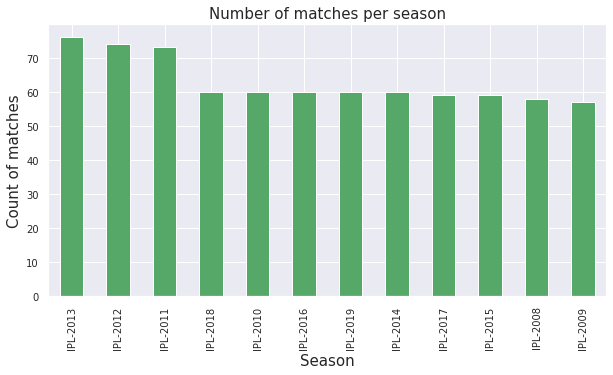

In [87]:
# creating a bar chart for the same

matches_per_season.plot(kind = "bar" , color = "g")
plt.title("Number of matches per season" , fontsize = 15)
plt.xlabel("Season" ,  fontsize = 15)
plt.ylabel("Count of matches" , fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 <a list of 9 Text major ticklabel objects>)

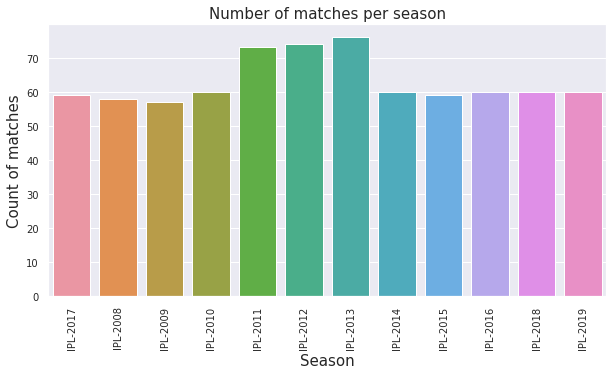

In [93]:
# We can plot this directly using countplot of seaborn too!!
# Giving it a try!

sns.countplot(matches_df["Season"])
plt.title("Number of matches per season" , fontsize = 15)
plt.xlabel("Season" ,  fontsize = 15)
plt.ylabel("Count of matches" , fontsize = 15)
plt.xticks(fontsize = 10 , rotation = "vertical")
plt.yticks(fontsize = 10)

Most matches were played in season 2011, 2012, 2013 and for other seasons, it's almost same number of matches!!

There must be some reason:


*   As far as I know, during these seasons there were 9 or 10 playing teams and hence contributing to more number of matches than other seasons


*Let's check whether this statement is supported by our dataset or not!*





# Which were the teams who batted first and won?

*As we have the information of toss winner , toss decision , win_by_runs & win_by_wickets, we can address the above problem statement*



*   Teams who batted first and won, must be won with some runs i.e. there should be win by runs greater than 0






In [21]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [22]:
batted_first = matches_df[matches_df["win_by_runs"] != 0].reset_index().drop("index" , axis = 1) # win_by_runs already in int type
batted_first.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
2,9,IPL-2017,Pune,11-04-2017,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
3,14,IPL-2017,Kolkata,15-04-2017,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong,NaN
4,15,IPL-2017,Delhi,15-04-2017,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN


In [23]:
# 756 total matches played from 2008 - 2019

matches_df.shape

(756, 18)

In [24]:
# 743 had clear winners , 9 were tie , 4 no results
matches_df["result"].value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

In [25]:
# Out of 743 normal matches, 337 matches were there where the team who batted first won!

batted_first.shape

(337, 18)

In [26]:
# Teams who batted first and won

batted_first["winner"].value_counts() # with Mumbai Indians on the top

Mumbai Indians                 57
Chennai Super Kings            52
Kings XI Punjab                38
Kolkata Knight Riders          36
Royal Challengers Bangalore    35
Sunrisers Hyderabad            30
Rajasthan Royals               27
Delhi Daredevils               25
Deccan Chargers                18
Pune Warriors                   6
Rising Pune Supergiant          5
Delhi Capitals                  3
Kochi Tuskers Kerala            2
Rising Pune Supergiants         2
Gujarat Lions                   1
Name: winner, dtype: int64

*Woahhh! seems like if Mumbai Indians elected to bat first, the other team is going HOME!!!*

# Summary based of range of runs with which most of the team won!!

In [27]:
# getting season wise win by runs distribution

win_runs = matches_df[matches_df["win_by_runs"] != 0][["Season" , "win_by_runs"]].sort_values(by="win_by_runs" , ascending = False)
win_runs.head()

,Season,win_by_runs
43,IPL-2017,146
619,IPL-2016,144
59,IPL-2008,140
556,IPL-2015,138
410,IPL-2013,130


Text(0.5, 0, 'Seasons')

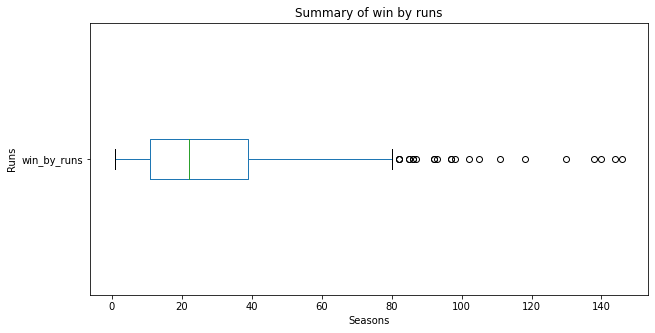

In [28]:
# creating box plot to get the common range of runs with which most of the teams won and identifying the outliers

win_runs.plot(kind = "box" , vert = False) # vert = False to make it horizontal as in vertical it was not that much appealing
plt.title('Summary of win by runs')
plt.ylabel('Runs')
plt.xlabel('Seasons')


*As we can see above most of the matches were won with the runs in between 15 to 40 and the runs above 80's are outliers here!!*

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

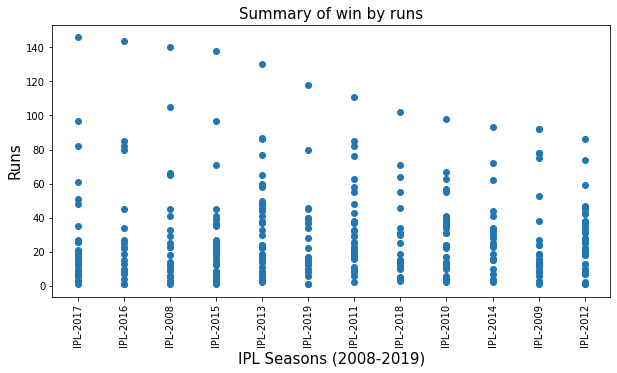

In [29]:
# Alternatively, we can use scatterplot too to see the common range and outliers

plt.scatter(win_runs["Season"] , win_runs["win_by_runs"])
plt.title("Summary of win by runs" , fontsize = 15)
plt.xlabel("IPL Seasons (2008-2019)" , fontsize = 15)
plt.ylabel("Runs" , fontsize = 15)
plt.xticks(rotation = "vertical")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 <a list of 10 Text major ticklabel objects>)

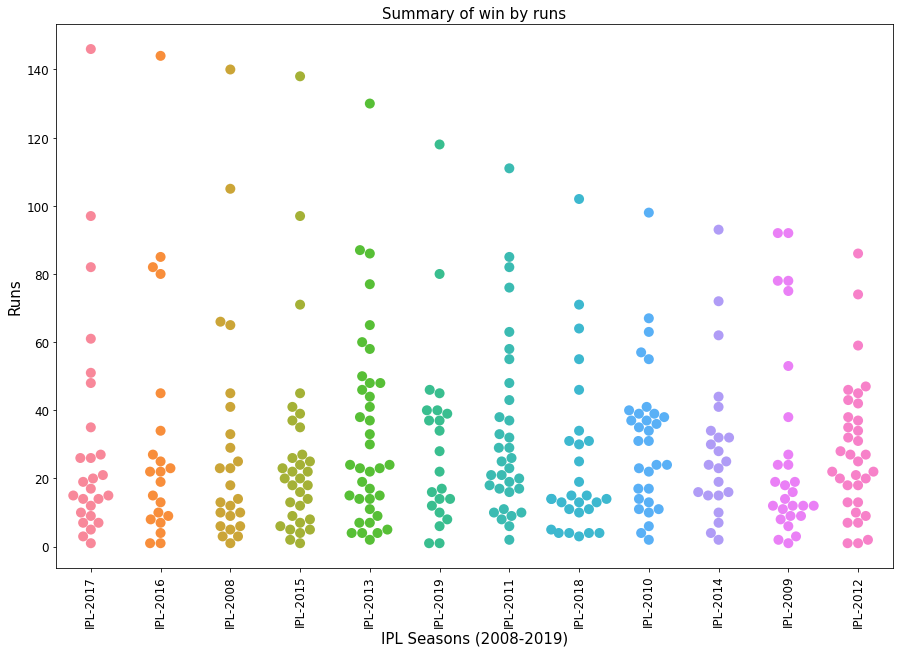

In [30]:
# We can use the swarmplot too using seaborn library (somewhat similar to scatterplot or stripplot , only thing is datapoints are clear in swarmplot, they are not overlapping)

# creating swarmplot

plt.gcf().set_size_inches(15, 10)
sns.swarmplot(win_runs["Season"] , win_runs["win_by_runs"] , size = 10)
plt.title("Summary of win by runs" , fontsize = 15)
plt.xlabel("IPL Seasons (2008-2019)" , fontsize = 15)
plt.ylabel("Runs" , fontsize = 15)
plt.xticks(rotation = "vertical" , fontsize = 12)
plt.yticks(fontsize = 12)

*We can easily find the Outliers here, above 80*

# Max runs / wickets with which any team won in the history of IPL (2008-2019)?

In [31]:
matches_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [32]:
# getting match details and team which won with maximum margin of runs

max_runs_win = matches_df.iloc[matches_df["win_by_runs"].idxmax()]
max_runs_win

id                               44
Season                     IPL-2017
city                          Delhi
date                     06-05-2017
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

In [33]:
print(f"Team {max_runs_win['winner']} had won with the maximum runs {max_runs_win['win_by_runs']} ever in the history of IPL.")

Team Mumbai Indians had won with the maximum runs 146 ever in the history of IPL.


***Ahhann!! Mumbai Indians won't let you SHINE!!!***

In [34]:
# getting team which won with the highest wickets in IPL history (this won't give much info as some other team might have won with 10 wicktes too)

max_wickets_win = matches_df.iloc[matches_df["win_by_wickets"].idxmax()]
max_wickets_win

id                                                      3
Season                                           IPL-2017
city                                               Rajkot
date                                           07-04-2017
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
umpire3       

In [35]:
print(f"Team {max_wickets_win['winner']} had won with the maximum wickets {max_wickets_win['win_by_wickets']} ever in the history of IPL during season {max_wickets_win['Season']}.")

Team Kolkata Knight Riders had won with the maximum wickets 10 ever in the history of IPL during season IPL-2017.


*Finally, Shahrukh came into picture :D , KKR holds the record to beat opponent with no wickets lost of theirs!!*

In [36]:
# As i said, win_by_wickets won't tell much

a = matches_df[matches_df["win_by_wickets"] == 10]
a.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
34,35,IPL-2017,Chandigarh,30-04-2017,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,10,Sandeep Sharma,"Punjab Cricket Association IS Bindra Stadium, ...",YC Barde,CK Nandan,NaN
71,72,IPL-2008,Mumbai,27-04-2008,Mumbai Indians,Deccan Chargers,Deccan Chargers,field,normal,0,Deccan Chargers,0,10,AC Gilchrist,Dr DY Patil Sports Academy,Asad Rauf,SL Shastri,NaN
119,120,IPL-2009,Cape Town,19-04-2009,Kings XI Punjab,Delhi Daredevils,Delhi Daredevils,field,normal,1,Delhi Daredevils,0,10,DL Vettori,Newlands,MR Benson,SD Ranade,NaN
183,184,IPL-2010,Bangalore,18-03-2010,Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,10,JH Kallis,M Chinnaswamy Stadium,K Hariharan,DJ Harper,NaN


In [37]:
a.shape # 11 matches were there in which teams won without losing their single wicket

(11, 18)

In [38]:
a["winner"].value_counts() # with RCB on the top which won 3 matches without losing single wicket

Royal Challengers Bangalore    3
Kings XI Punjab                1
Delhi Daredevils               1
Deccan Chargers                1
Mumbai Indians                 1
Sunrisers Hyderabad            1
Kolkata Knight Riders          1
Rajasthan Royals               1
Chennai Super Kings            1
Name: winner, dtype: int64

*That's interesting the team which never won IPL trophy had won the maximum number of matches without losing a single wicket!!*

# Number of wins by each team

*Will get to know team with the most number of wins*

In [39]:
# getting wins for each team

wins = matches_df["winner"].value_counts()
wins

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

Text(0.5, 1.0, 'Total wins by each team')

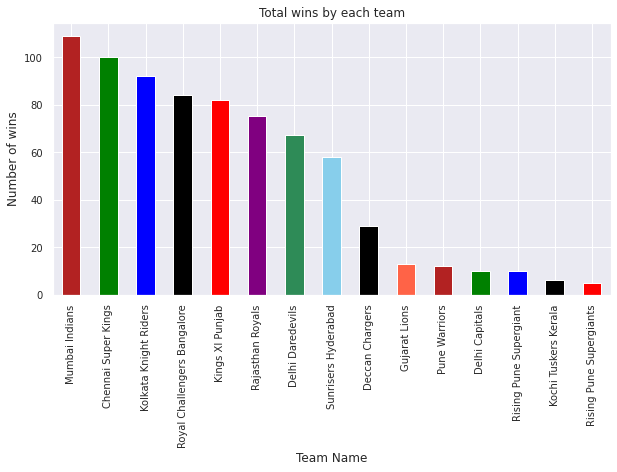

In [40]:
# Creating the figure object

# Setting the style to grid
sns.set(style = "darkgrid")

# getting bar blot with different colors of each bar
wins.plot(kind = "bar" , 
          color = ['firebrick', 'green', 'blue', 'black', 'red',
                  'purple', 'seagreen', 'skyblue', 'black', 'tomato'])

plt.xticks(fontsize = 10) # setting the fontsize
plt.yticks(fontsize = 10) #setting the fontsize
plt.xlabel("Team Name") #labelling the x axis
plt.ylabel("Number of wins") #labelling the y axis
plt.title("Total wins by each team") #setting the title of the plot


# Trying to put the respective bar values

# for index , value in enumerate(wins):
#   # print(i)
#   plt.text(value , index , str(value))




*Ohh! right now, we find out that the best team of IPL till 2019 was Mumbai Indians and then after CSK!!* *Not bad!!*

# Which city hosted the most number of matches?

In [94]:
city_most_matches = matches_df["city"].value_counts()
city_most_matches.head() # mumbai being the top

# we can do bar chart here as well

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Ahmedabad          12
Centurion          12
Mohali             10
Rajkot             10
Dharamsala          9
Indore              9
Johannesburg        8
Cape Town           7
Abu Dhabi           7
Cuttack             7
Port Elizabeth      7
Ranchi              7
Raipur              6
Sharjah             6
Kochi               5
Kanpur              4
Kimberley           3
Nagpur              3
East London         3
Bloemfontein        2
Name: city, dtype: int64

*Most of the matches were played at the home ground*

# Number of matches hosted in each stadium

In [42]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

```
Null values for city = 7

Null values for venue = 0

Even if we add 7 to the count of Kolkata it will be 77 + 7 = 84 (still less than than of Mumbai)
```

In [43]:
matches_df["venue"].value_counts()[0:5] # eden gardens hosted the most number of matches

Eden Gardens                                 77
Wankhede Stadium                             73
M Chinnaswamy Stadium                        73
Feroz Shah Kotla                             67
Rajiv Gandhi International Stadium, Uppal    56
Name: venue, dtype: int64

In [106]:
# matches_df["venue"].value_counts()

Eden Gardens                                            77
Wankhede Stadium                                        73
M Chinnaswamy Stadium                                   73
Feroz Shah Kotla                                        67
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
Sardar Patel Stadium, Motera                            12
SuperSport Park                                         12
Brabourne Stadium                                       11
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     

**Here's the interesting thing coming out of it:**


*  Mumbai has hosted most number of the matches as we saw above "BUT" Wankhede is not at the top.
*  Eden Gardens is in the top which is in Kolkata.
* Our data is not telling us what we expected.
* But simple the reason for this is Mumbai has more number of stadiums(one of which is DY Patil Stadium other than Wankhede)
* When we combine for both we will get (73 + 17 = 90). Now, this statisfies the fact that Mumbai hosted the most number of matches!!



# Eden Gardens (Kolkata) & Wankhede (Mumbai) being on the top 2 stadium with most number of matches hosted!!

#*So, let's see what were the outcomes when matches were played in these 2 stadium!!*

In [60]:
# getting match details that held on eden gardens

eden = matches_df[matches_df["venue"] == "Eden Gardens"]
eden.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
10,11,IPL-2017,Kolkata,13-04-2017,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,8,SP Narine,Eden Gardens,A Deshmukh,NJ Llong,NaN
13,14,IPL-2017,Kolkata,15-04-2017,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong,NaN
22,23,IPL-2017,Kolkata,21-04-2017,Kolkata Knight Riders,Gujarat Lions,Gujarat Lions,field,normal,0,Gujarat Lions,0,4,SK Raina,Eden Gardens,CB Gaffaney,Nitin Menon,NaN
26,27,IPL-2017,Kolkata,23-04-2017,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,82,0,NM Coulter-Nile,Eden Gardens,CB Gaffaney,CK Nandan,NaN
30,31,IPL-2017,Kolkata,28-04-2017,Delhi Daredevils,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,7,G Gambhir,Eden Gardens,NJ Llong,S Ravi,NaN


In [62]:
# getting matches which were won when batted first in eden gardens

eden_win_by_runs = eden[eden["win_by_runs"] != 0]

# getting matches which were won when batted second in eden gardens

eden_win_by_wickets = eden[eden["win_by_wickets"] != 0]

In [63]:
# creating a variable that will contain list of count of matches in both the above scenarios

x = [len(eden_win_by_runs) , len(eden_win_by_wickets)]
x

[32, 45]

Text(0.5, 1.0, 'Eden Gardens')

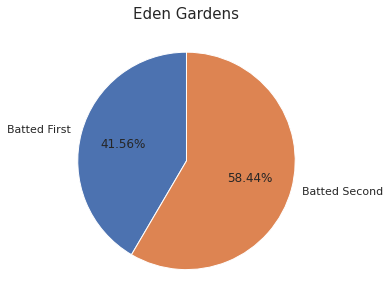

In [71]:
# Getting the plot for this distribution and pie chart will be best suited for this

plt.pie(x , labels=["Batted First" , "Batted Second"] , autopct= "%.2f%%" , startangle=90) #autopct will help to show the percentages in the pie chart using the string formatting
plt.title("Eden Gardens" , fontsize = 15)

*Seems interesting!!*

*Batting in the second inning in eden gardens and winning most of the times supported the fact that eden gardens is one of the best ground to CHASE!! *


*This might be the reason when teams played on eden and the one who won the toss would tend to opt to bowl first!!*



# Let's quickly have a glance at Wankhede!!

# Does it follow the same trend or what!!

In [72]:
wankhede = matches_df[matches_df["venue"] == "Wankhede Stadium"]
wankhede.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
9,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
15,16,IPL-2017,Mumbai,16-04-2017,Gujarat Lions,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,6,N Rana,Wankhede Stadium,A Nand Kishore,S Ravi,NaN
23,24,IPL-2017,Mumbai,22-04-2017,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,14,0,MJ McClenaghan,Wankhede Stadium,A Nand Kishore,S Ravi,NaN
27,28,IPL-2017,Mumbai,24-04-2017,Rising Pune Supergiant,Mumbai Indians,Mumbai Indians,field,normal,0,Rising Pune Supergiant,3,0,BA Stokes,Wankhede Stadium,A Nand Kishore,S Ravi,NaN


In [73]:
# getting matches which were won when batted first in wankhede

wankhede_win_by_runs = wankhede[wankhede["win_by_runs"] != 0]

# getting matches which were won when batted second in wankhede

wankhede_win_by_wickets = wankhede[wankhede["win_by_wickets"] != 0]

In [76]:
# creating a variable that will contain list of count of matches in both the above scenarios

y = [len(wankhede_win_by_runs) , len(wankhede_win_by_wickets)]
y

[35, 37]

Text(0.5, 1.0, 'Wankhede Stadium')

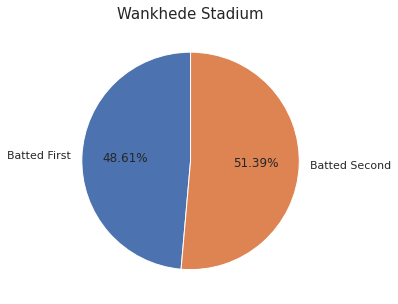

In [77]:
# Getting the plot for this distribution and pie chart will be best suited for this

plt.pie(y , labels=["Batted First" , "Batted Second"] , autopct= "%.2f%%" , startangle=90) #autopct will help to show the percentages in the pie chart using the string formatting
plt.title("Wankhede Stadium" , fontsize = 15)

*ohh!! Wankhede seems to be neutral whether you bat first or second!!*

# Winning the toss implies winning the match??

# Does this make sense??


# *let's see this in action*



In [44]:
# getting number of matches in which the team who won the toss had won the match too

matches_df[matches_df["toss_winner"] == matches_df["winner"]].head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,IPL-2017,Hyderabad,09-04-2017,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN


In [45]:
matches_df.info() # no null in toss winner , 4 null in winner (as 4 were like tie or no result match)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [46]:
matches_df[matches_df["toss_winner"] == matches_df["winner"]].shape #i.e 393 matches out of 752 matches were won by teams who won the toss

(393, 18)

In [81]:
a = matches_df[matches_df["toss_winner"] == matches_df["winner"]].shape[0]
a

393

In [47]:
(393/752)*100 # 52 % winning were there as winning the toss actually got lucky for the teams :D

52.26063829787234

In [82]:
# getting count of matches for which there was a clear winner

b = len(matches_df[~matches_df["winner"].isna()])
b

752

In [83]:
# This might be done with the help of numpy, will do this

print(f"Winning the toss implies the {round(a/b , 2)*100} % chances of winning the match!!")

Winning the toss implies the 52.0 % chances of winning the match!!


*Moral of the story:*

*Win the toss, win the match!!* 

*Hurraaaayyyyy!!!!*

# Best defending champion!!

*They won't let you chase mann!!*

In [49]:
# getting max frequency of team which won by win by runs (as win by run will imply defending and getting mode of the team will tell which team defended most number of times)

matches_df[matches_df["win_by_runs"] != 0]["winner"].mode()

0    Mumbai Indians
dtype: object

*And as Expected, MUMBAI!!*



```
Mumbai won't let their supporters down!!
```



# Best chasing champion!!

In [50]:
# like we did above for defending we can do the same to get the chasing champion

matches_df[matches_df["win_by_wickets"] != 0]["winner"].mode()

0    Kolkata Knight Riders
dtype: object


`Shahrukh must be happy :D`



# Which team was consistent throughout the IPL??

In [78]:
matches_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
